# Mini project 8.1.3:  Part 1b

# Inferential Statistics:  Frequentism

### Step:  Set up

In [1]:
# Load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind_from_stats
from numpy.random import seed
import seaborn as sns

In [2]:
# Set up some defaults
sns.set()
sns.set_style({'axes.grid' : False})

### Step:  Collect data

In [3]:
medical = pd.read_csv('data/insurance2.csv')

### Step:  Assess data

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [6]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


### Step:  Explore data

__Q:__ Plot the histogram of charges.

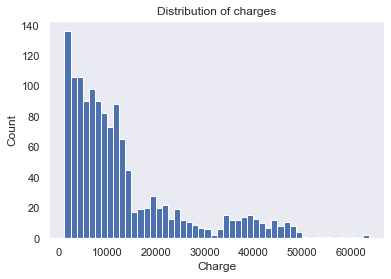

In [7]:
_ = plt.hist(medical.charges, bins=50)
_ = plt.xlabel("Charge")
_ = plt.ylabel("Count")
_ = plt.title("Distribution of charges")

__Q:__ Calculate the mean and standard deviation.

In [8]:
sample_mean = np.mean(medical.charges)
print('The sample mean is {}'.format(sample_mean))
sample_std = np.std(medical.charges)
print('The standard deviation of the sample (aka, with n) {}'.format(sample_std))
sample_std_pop = np.std(medical.charges, ddof=1)
print('The sample standard deviation (aka, with n-1) is {}'.format(sample_std_pop))
sample_count =  medical.charges.count()
print('The count is {}'.format(sample_count))

The sample mean is 13270.422265141257
The standard deviation of the sample (aka, with n) 12105.484975561605
The sample standard deviation (aka, with n-1) is 12110.011236693994
The count is 1338


In [18]:
# Compare to describe()
medical.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

__Q:__ Comment on the appropriateness of these statistics for the data.

Takeaways:

* This data seems appropriate.
* I'm not sure if 1,300 medical bills is the population or just a sample
* I assume it's just a sample.
* I assume it's a random sample.
* But the sample, most certainly, isn't normally distributed.
* And there might be some outliers above 50,000 dollars.

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

* The sample mean is above 12,000.
* This data could speak to the population if:
    * the sample was random (yes)
    * the sample was large enough (yes)
    * the sampled events are independent (most likely))
* A valid test would be to construct a confidence interval

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval?

* The question is about values that are less than a given value.  
* This is a one-sided test
* A t-stat is appropriate

__Q:__ Calculate the critical value

In [10]:
p = 0.05
size = medical.charges.count()
df = size - 1
crit_value = t.ppf(p, df)
print('The critical value is {}'.format(crit_value))

The critical value is -1.6459941145571324


__Q:__  Calculate the relevant 95% confidence interval for the mean

In [11]:
# Note:  I'm using the n-1
standard_error = sample_std_pop / np.sqrt(size)
margin_of_error = crit_value * standard_error
print('The margin of error is: {}'.format(margin_of_error))

The margin of error is: -544.9350813250253


In [12]:
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error
print('The lower limit of the confidence interval is {}'.format(ci_lower))
print('The upper limit of the confidence interval is {}'.format(ci_upper))
print('Our calculated value is {}'.format(sample_mean))

The lower limit of the confidence interval is 13815.357346466282
The upper limit of the confidence interval is 12725.48718381623
Our calculated value is 13270.422265141257


__Q:__  Comment on whether the administrator should be concerned?

* The sample mean is not below the target value of 12,000
* The sample mean is within the 95% confidence interval

__Q:__ State the null and alternative hypothesis here.

The hypothesis is:
    
* H0: The mean of the sample with insurance is the same as the mean of the sample without insurance (aka, there is no difference)
* H1: The mean of the sample with insurance is NOT the same as the mean of the sample without insurance (aka, there is a difference)

Also, we're:

* using t-test
* assuming that the sample and pop have similar variances

__Q:__ Perform this hypothesis test both manually

In [13]:
# Separate insured from un-insured
sample_ins_y = medical[medical.insuranceclaim == 1]
sample_ins_n = medical[medical.insuranceclaim != 1]

In [19]:
# Calc mean, standard deviation and count for each

sample_ins_y_mean = np.mean(sample_ins_y.charges)
print('For yes insurance, the sample mean is {}'.format(sample_ins_y_mean))
sample_ins_y_std_pop = np.std(sample_ins_y.charges, ddof=1)
print('For yes insurance, the sample standard deviation (aka, with n-1) is {}'.format(sample_ins_y_std_pop))
sample_ins_y_count = sample_ins_y.charges.count()
print('For yes insurance, the count is {}'.format(sample_ins_y_count))

sample_ins_n_mean = np.mean(sample_ins_n.charges)
print()
print('For no insurance, the sample mean is {}'.format(sample_ins_n_mean))
sample_ins_n_std_pop = np.std(sample_ins_n.charges, ddof=1)
print('For no insurance, the sample standard deviation (aka, with n-1) is {}'.format(sample_ins_n_std_pop))
sample_ins_n_count = sample_ins_n.charges.count()
print('For yes insurance, the count is {}'.format(sample_ins_n_count))

For yes insurance, the sample mean is 16423.928276537663
For yes insurance, the sample standard deviation (aka, with n-1) is 14045.928418802127
For yes insurance, the count is 783

For no insurance, the sample mean is 8821.421892306294
For no insurance, the sample standard deviation (aka, with n-1) is 6446.510126811736
For yes insurance, the count is 555


In [20]:
# Calc pooled standard deviation - manually
n0 = sample_ins_y_count
n1 = sample_ins_n_count
x0 = sample_ins_y_mean
x1 = sample_ins_n_mean
s0 = sample_ins_y_std_pop
s1 = sample_ins_n_std_pop
pool_std = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))
pool_t_stat = (x0 - x1) / ((pool_std) * np.sqrt((1/n0) + (1/n1)))

print('When calculated by hand:')
print('The pooled standard deviation is {}'.format(pool_std))
print('The pooled t-stat is {}'.format(pool_t_stat))

When calculated by hand:
The pooled standard deviation is 11520.034268775256
The pooled t-stat is 11.89329903087671


__Q:__ Perform this hypothesis test using the appropriate function from scipy

In [21]:
# Calcs from scipy
t_test, p_val = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print('When calculated via scipy:')
print('The t test is {}'.format(t_test))
print('The pooled t-stat is {}'.format(p_val))

When calculated via scipy:
The t test is 11.893299030876712
The pooled t-stat is 4.461230231620717e-31


__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

In [17]:
# Cacl using Welch's t-test
t_test_w, p_val_w = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1, equal_var=False)
print('When calculated via scipy and assuming un-equalvariance: ')
print('The t test is {}'.format(t_test_w))
print('The pooled t-stat is {}'.format(p_val_w))

When calculated via scipy and assuming un-equalvariance: 
The t test is 13.298031957975647
The pooled t-stat is 1.1105103216309438e-37


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

* scipy.stats.zscore allows you to compute the z score of each value in the sample, relative to the sample mean and standard deviation.